## Homework 10 
Felipe Alves - N14713445

In [1]:
using Roots
using PyPlot

In [2]:
#== Use to compute the h() function ==#
function f_imph(h,n, ρ)
    return 1./(h + ρ*n) + ρ/(ρ*h + n) - 2
end


function h(n, ρ = 0.5)
    return fzero(h -> f_imph(h,n,ρ), 0.0, 1.0)
end

h (generic function with 2 methods)

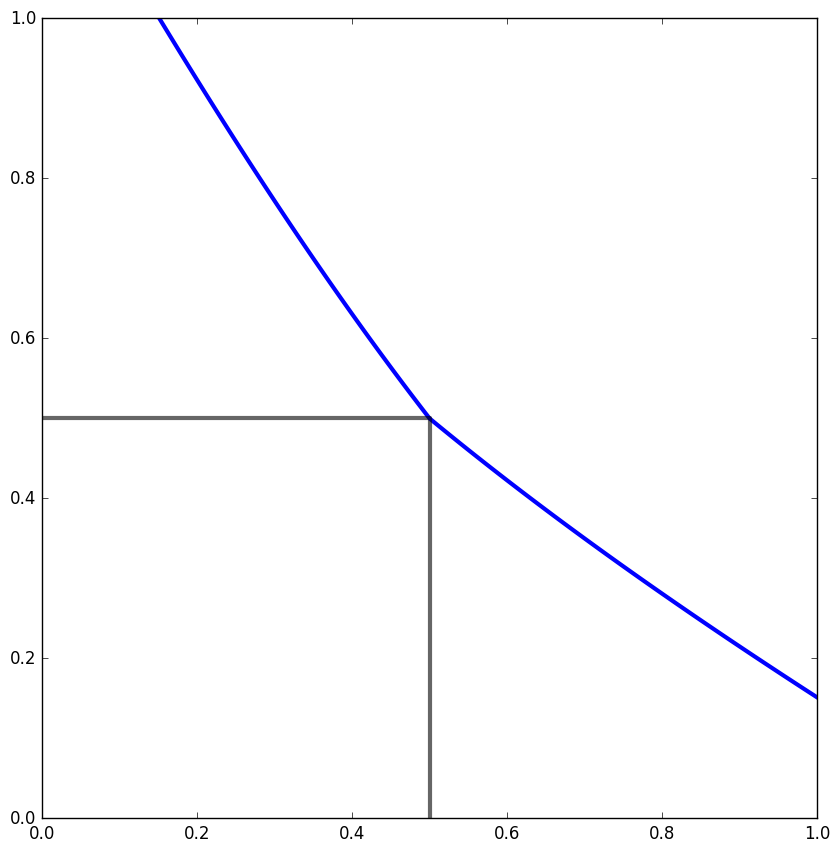

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x322444160>

In [3]:
#== Plotting the h() ==#

ρ = 0.5
# N  = collect(0.0:0.01:1)
n1 = collect(0.5:0.01:1)
n2 = collect(1.0:-0.01:0.5)

# yN = Float64[h(n,ρ) for n in N]
y2 = Float64[h(n,ρ) for n in n1]
x1 = Float64[h(n,ρ) for n in n2]

#= Create series vector =#
x = [x1; n1]
y = [n2; y2]

y_half = [0.5, 0.5, 0.0]
x_half = [0, 0.5, 0.5]

#== Plot ==# 
fig, ax = subplots(figsize = (10,10))
# ax[:plot](N,yN, lw = 3)
ax[:plot](x,y, lw = 3)
ax[:plot](x_half,y_half,"k", lw = 3, alpha = 0.6)
# ax[:plot](n1,y2, lw = 3)

In [4]:
"""
Computes next period state for the case the two countries are of equal size [page 23 in paper]

"""
function F_trans(n::Tuple{Float64,Float64}, ρ = 0.2, δ = 0.7, θ = 2.5 )
    
    n1, n2 = n 
    
    h1, h2 = h(n1, ρ), h(n2, ρ)
    
    if n1 <= 0.5 && n2 <= 0.5 # DLL

        n1_next = δ * ( 0.5*θ + (1-θ) * n1 )
        n2_next = δ * ( 0.5*θ + (1-θ) * n2 )
        
    elseif n1 >= h2 && n2 >= h1 #DHH
        
        n1_next = δ * n1
        n2_next = δ * n2
        
    elseif n1 >  0.5 && n2 < h1
        
        n1_next = δ * n1
        n2_next = δ * ( θ*h1 + (1-θ)*n2 )
        
    elseif n1 <  h2 && n2 > 0.5
        n1_next = δ * ( θ*h2 + (1-θ)*n1 )
        n2_next = δ * n2
    end
    
    return n1_next, n2_next
end

F_trans (generic function with 4 methods)

In [5]:
function simul_trajectory(n_init::Tuple{Float64,Float64}, ρ = 0.2, T = 50; plot = true)
    
    n_path = ones(2,T)
    n_path[:,1] = collect(n_init)
    n_t = n_init
    
    for t=2:T        
        n_t1 = F_trans(n_t, ρ)
        n_path[:,t] = collect(n_t1)
        n_t = n_t1
    end
    
    if plot
        n_path = n_path' 
        #== Plot ==# 
        fig, ax = subplots(figsize = (10,10))
        ax[:plot](collect(1:T),n_path[:,1],lw = 2, alpha = 0.7, label = "Country 1")
        ax[:plot](collect(1:T),n_path[:,2], "-o", lw = 2, alpha = 0.7, label = "Country 2")
        PyPlot.show()
    end    
    
    return n_path
end

simul_trajectory (generic function with 3 methods)

Let's give an example of an synchronized and asynchronized cycle. 

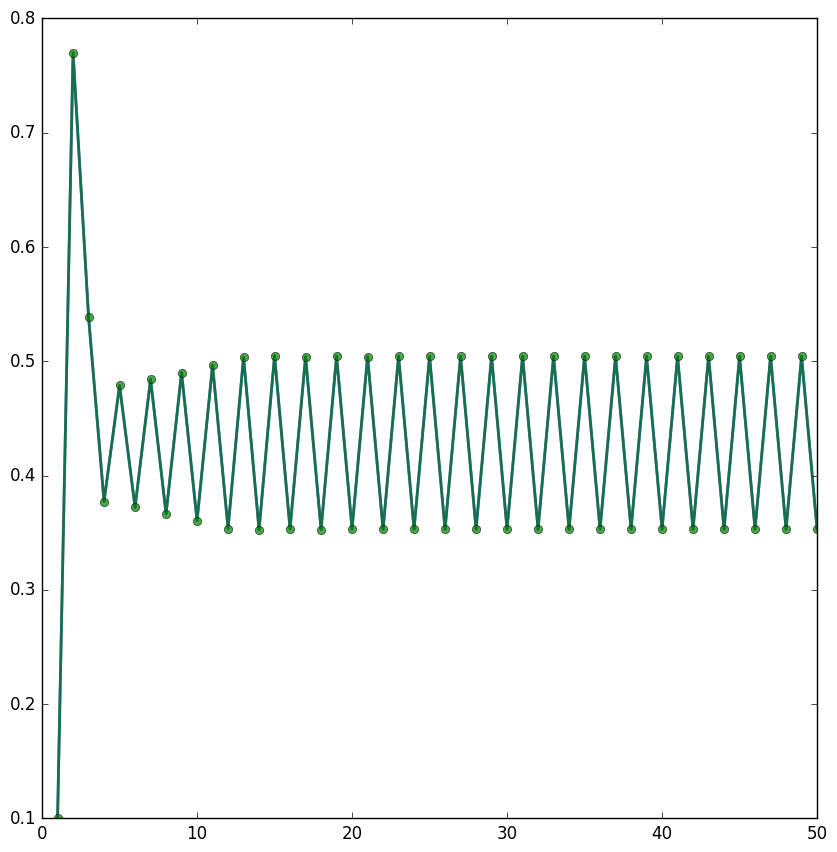

In [6]:
#== Synchronized 2-cycle ==#
n_path1 = simul_trajectory((0.1,0.1));

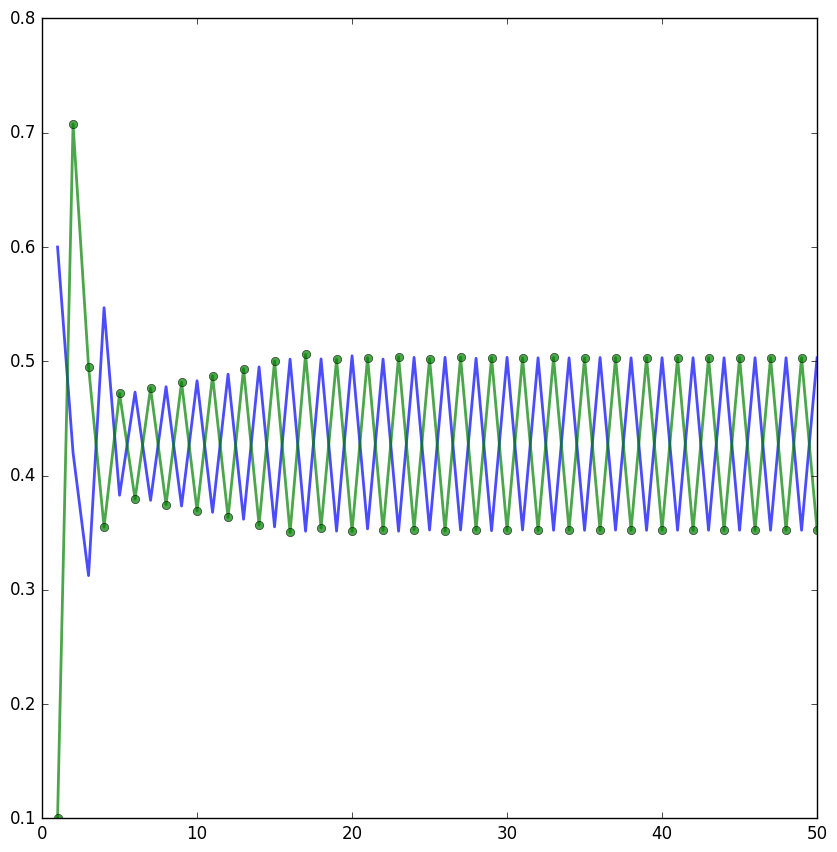

In [7]:
#== Symmetric asynchronized cycle ==#
n_path = simul_trajectory((0.6,0.1));

In [20]:
function check_convergence(n_init::Tuple{Float64,Float64} , ρ = 0.2, tol = 1e-2)
    
    n_path = simul_trajectory(n_init::Tuple{Float64,Float64}, ρ ; plot = false)
    n1, n2 = n_path[:,end-1:end]
    isapprox(n1, n2, rtol = tol) ? 1.0 : 0.0 # 1.0 stands for Synchronized
end

check_convergence (generic function with 3 methods)

Check function for the initial points on the graph

In [21]:
#== Synchronized 2-cycle ==#
check_convergence((0.1,0.1), 0.2)

1.0

In [22]:
#== Symmetric asynchronized cycle ==#
check_convergence((0.6,0.1), 0.2)

0.0

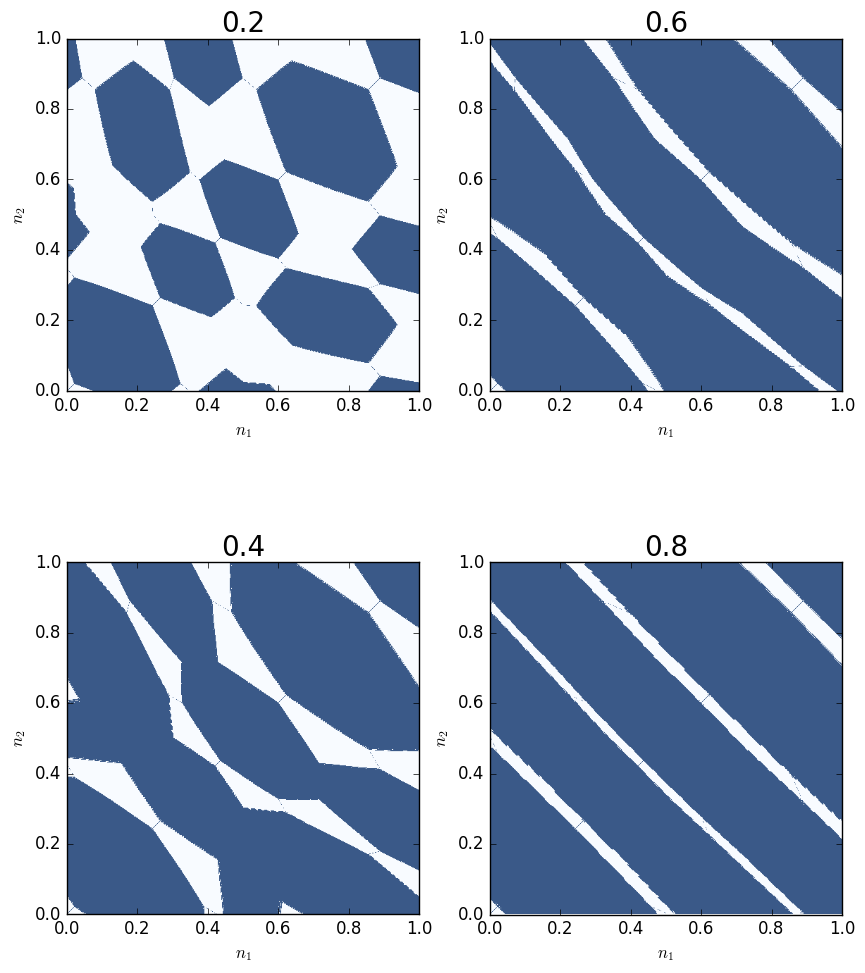

In [19]:
#== Plot Figure ==#
fig, axes = subplots(2,2,figsize=(10, 12))

j=1
for ρ in [0.2,0.4, 0.6,0.8]
    data = Float64[check_convergence((i,j), ρ) for i=0.0:0.002:1.0, j=0.0:0.002:1.0]
    
    ax = axes[j]
    ax[:imshow](data, ColorMap("Blues"), alpha = 0.8, origin="lower",
            extent=[0.0,1.0, 0.0, 1.0])
    ax[:set_ylim](0.0, 1.0)
    ax[:set_xlim](0.0, 1.0)
    ax[:set_xlabel](L"$n_1$")
    ax[:set_ylabel](L"$n_2$")
    ax[:set_title]("$ρ", fontsize = 20)
        
    j += 1 
end